In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('train.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
sns.set()

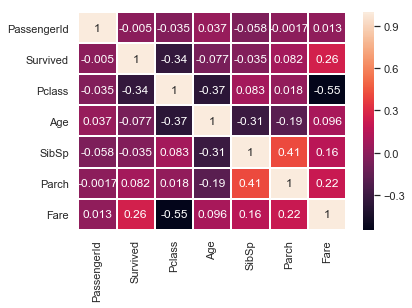

In [7]:
sns.heatmap(data.corr(), annot = True, linewidth = 1, linecolor = 'w')

In [8]:
data.shape

(891, 12)

In [9]:
total = data.groupby(['Pclass', 'Survived'])['Survived'].count()

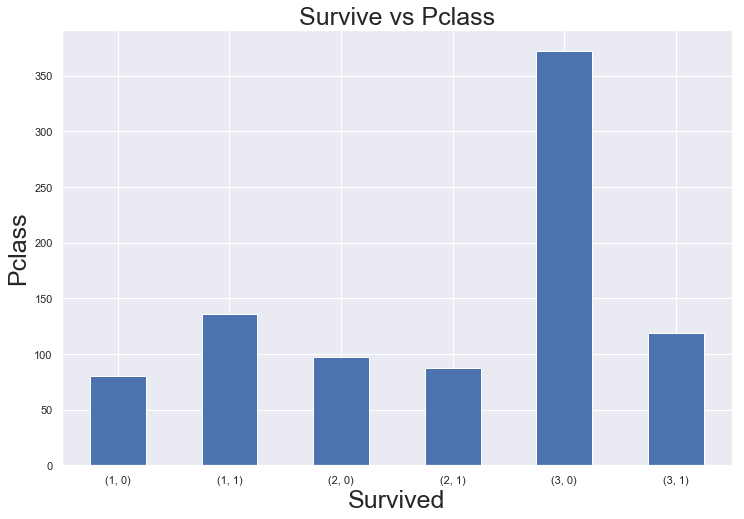

In [10]:
font = {
    'size' : 25
}
sns.set(rc={'figure.figsize':(12, 8)})
total.plot(kind='bar')
plt.xlabel('Survived', fontdict=font)
plt.ylabel('Pclass', fontdict=font)
plt.xticks(rotation=0)
plt.title('Survive vs Pclass', fontdict=font)
plt.savefig('survived.png')

In [11]:
pclass_data = pd.crosstab(data['Pclass'], data['Survived'])

In [12]:
pclass_data

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


In [13]:
pclass_data = pd.crosstab(data['Pclass'], data['Survived'])

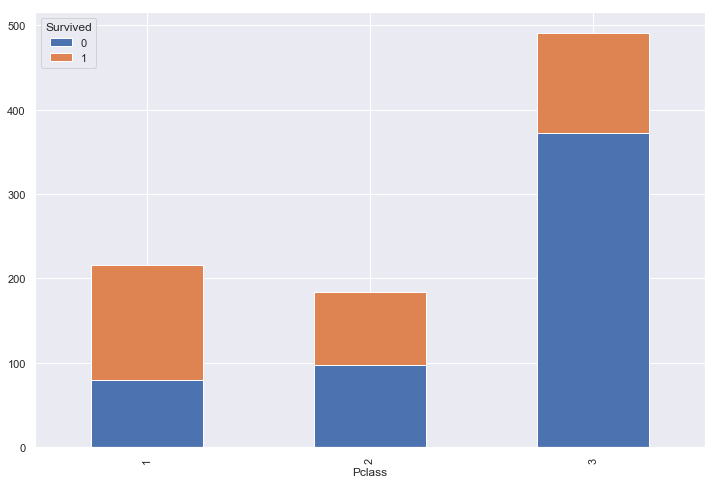

In [14]:
pclass_data.plot(kind = 'bar', stacked = True)

In [15]:
pclass_data['Total'] = pclass_data.sum(axis = 1)

In [16]:
pclass_data  = pclass_data.apply(lambda x: round (100 * x/pclass_data['Total']))

In [17]:
pclass_data.drop('Total', axis = 1, inplace = True)

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

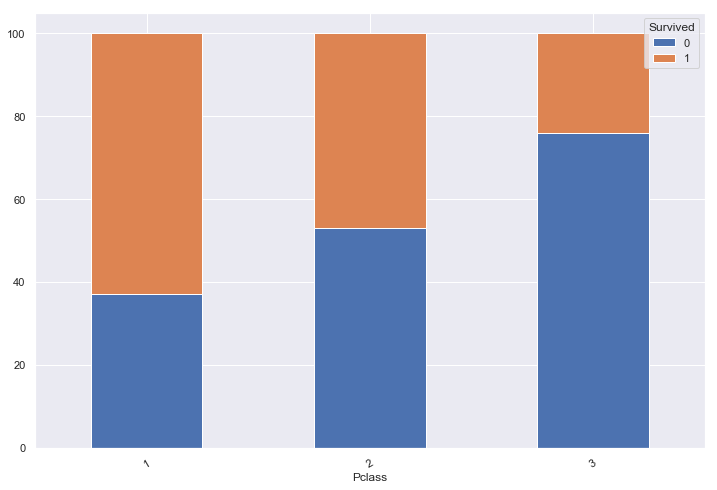

In [18]:
pclass_data.plot(kind = 'bar', stacked = True)
plt.xticks(rotation = 30)

In [19]:
training_data = data[['PassengerId', 'Pclass', 'Fare']]

In [20]:
output_data = data['Survived']

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X, x_test, Y, y_test = train_test_split(training_data, output_data,test_size = 0.3, random_state = 42)

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
model = LogisticRegression()

In [25]:
model.fit(X, Y)

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [26]:
predictions = model.predict(x_test)

In [27]:
predictions[:10]

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 1], dtype=int64)

In [28]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [29]:
confusion_matrix(predictions, y_test)

array([[134,  58],
       [ 23,  53]], dtype=int64)

In [30]:
score = accuracy_score(predictions, y_test)
score

0.6977611940298507

In [31]:
test_data = pd.read_csv('test.csv')
    

In [32]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [33]:
test_data = test_data[['PassengerId', 'Pclass', 'Fare']]

In [34]:
test_data.isnull()

,PassengerId,Pclass,Fare
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
5,False,False,False
6,False,False,False
7,False,False,False
8,False,False,False
9,False,False,False


In [35]:
test_data.isnull().sum()

PassengerId    0
Pclass         0
Fare           1
dtype: int64

In [36]:
test_data['Fare'] = test_data['Fare'].fillna(test_data['Fare'].mean())

In [37]:
test_data.isnull().sum()

PassengerId    0
Pclass         0
Fare           0
dtype: int64

In [38]:
test_predictions = model.predict(test_data)
test_predictions[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [39]:
test_submission = {
    'PassengerId' : test_data['PassengerId'],
    'Survived' : test_predictions
}

In [40]:
test_submission = pd.DataFrame(test_submission)

In [41]:
test_submission = test_submission.set_index('PassengerId')

In [42]:
test_submission.head()

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,0


In [43]:
test_submission.to_csv('submission.csv')